# Mahmoud Fathy Aboukelila
 
# Diabete Prediction

## Python Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool, cv
import warnings
warnings.filterwarnings("ignore")

## Reading data 

In [31]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.shape

(100000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [8]:
df.duplicated().sum()

3854

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(96146, 9)

In [11]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Data Visualization


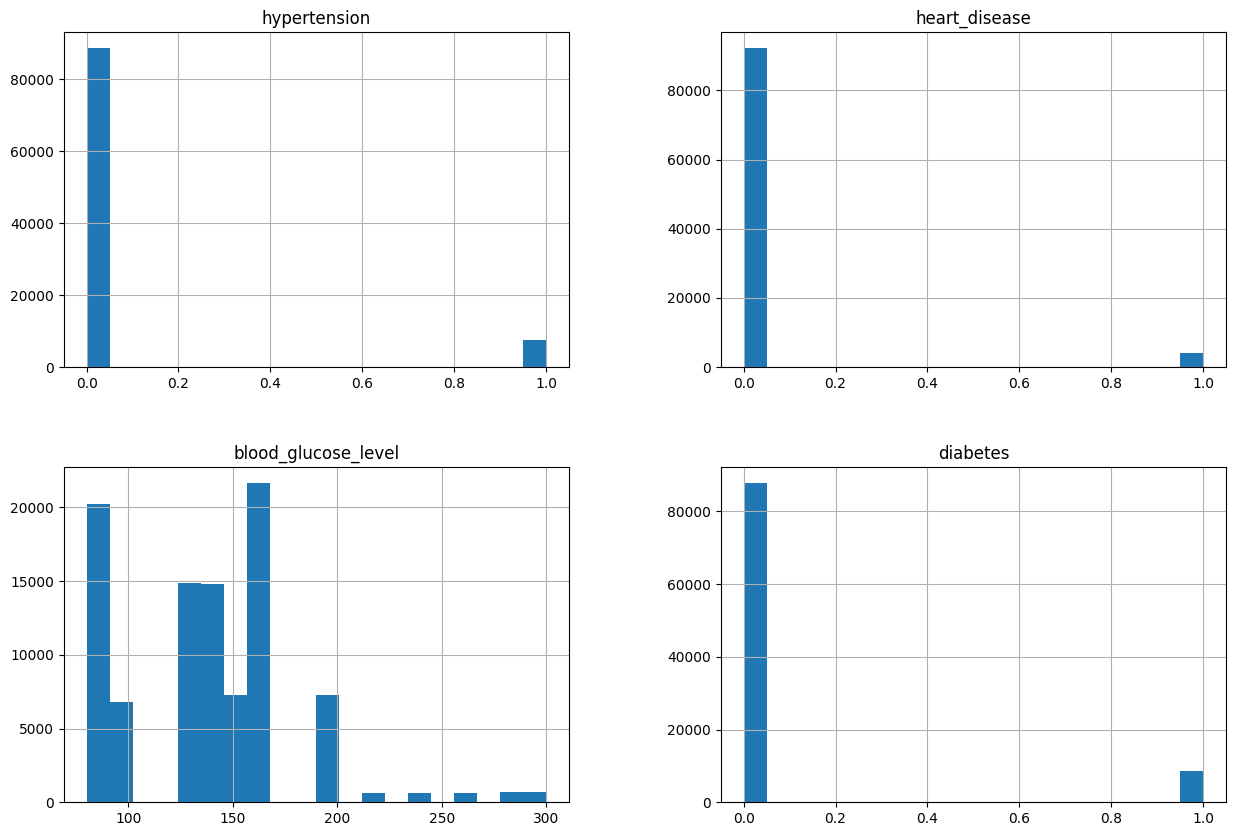

In [12]:
numeric_columns = df.select_dtypes(include=['int64'])
numeric_columns.hist(bins=20, figsize=(15, 10))
plt.show()

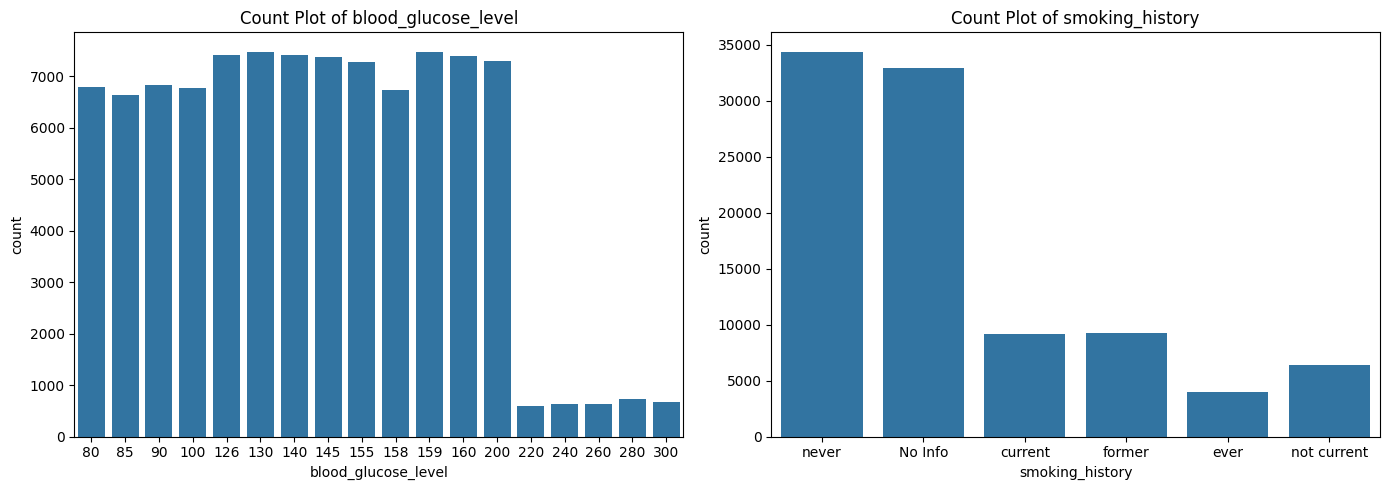

In [13]:
# Combined side-by-side count plot for categorical variables
categorical_columns = ['blood_glucose_level','smoking_history',]
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(14, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

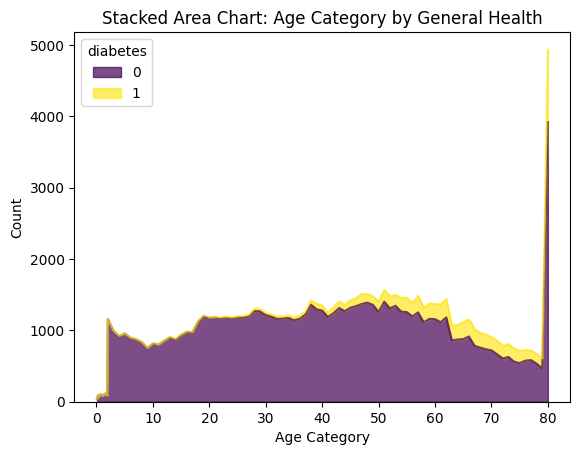

In [14]:
crosstab = pd.crosstab(df['age'],df['diabetes'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Age Category by General Health')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()


In [15]:
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now, df_encoded contains the label-encoded categorical columns
df_encoded.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


<Axes: >

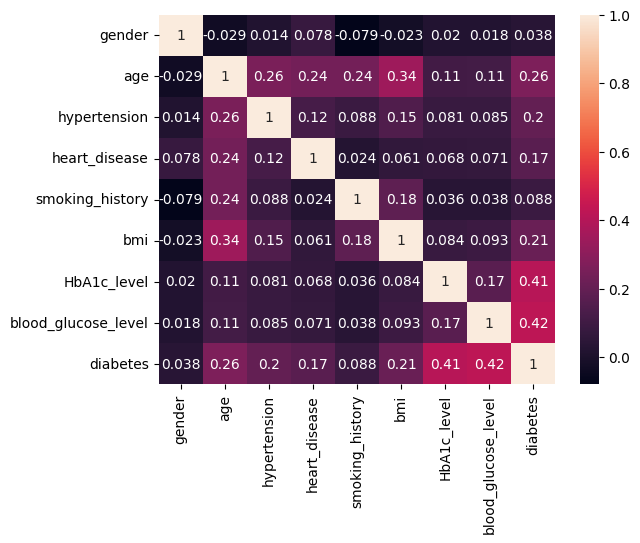

In [16]:
sns.heatmap(df_encoded.corr(), fmt='.2g', annot=True)


<Axes: xlabel='diabetes', ylabel='count'>

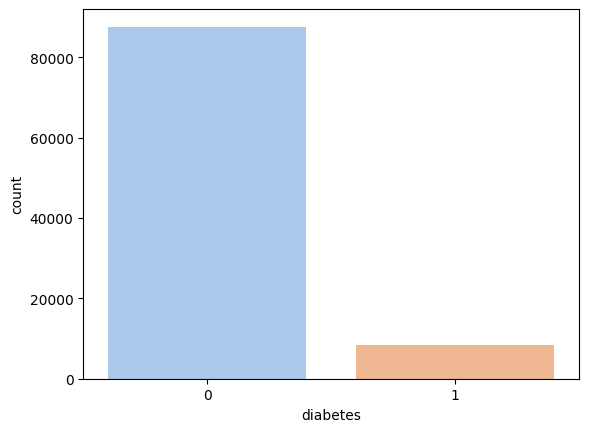

In [21]:
sns.countplot(x='diabetes',data=df_encoded,palette='pastel')

## preprocessing data 

In [22]:
# Split the data into training and testing sets
X = df_encoded.drop(columns=['diabetes'])  # Features
y = df_encoded['diabetes']  # Target variable

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (140262, 8)
X_test shape: (35066, 8)
y_train shape: (140262,)
y_test shape: (35066,)


## Removing outliers

In [24]:
# Define the columns to remove outliers
selected_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Calculate the IQR for the selected columns in the training data
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# SetTING a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# CreatING a mask for outliers in the selected columns
outlier_mask = (
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)

# Remove rows with outliers from X_train and y_train
X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]

# Print the number of rows removed
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")

Number of rows removed due to outliers: 43191


## Descien Tree

In [25]:
best_params = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

# Create and train the Decision Tree Classifier with the specified parameters
dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       random_state=0)

dt_classifier.fit(X_train_clean, y_train_clean)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Model Accuracy: 0.9707979239149033
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     17439
           1       0.98      0.96      0.97     17627

    accuracy                           0.97     35066
   macro avg       0.97      0.97      0.97     35066
weighted avg       0.97      0.97      0.97     35066



## xgboost classifier

In [26]:
# Create and train the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42,max_features='sqrt', n_estimators=100, max_depth=10)
xgb_classifier.fit(X_train_clean, y_train_clean)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("XGBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)

XGBoost Model Accuracy: 0.9745907716876747
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     17439
           1       0.99      0.96      0.97     17627

    accuracy                           0.97     35066
   macro avg       0.97      0.97      0.97     35066
weighted avg       0.97      0.97      0.97     35066



## catbost classifier

In [27]:
# Create the CatBoost Classifier
catboost_classifier = CatBoostClassifier(random_seed=42, logging_level='Silent', learning_rate=0.1, depth=10,subsample=0.8)

catboost_classifier.fit(X_train_clean, y_train_clean)

# Predict on the test set
y_pred = catboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("CatBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)

CatBoost Model Accuracy: 0.9798665373866423
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17439
           1       0.99      0.97      0.98     17627

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



### show accauarcy of 3 models

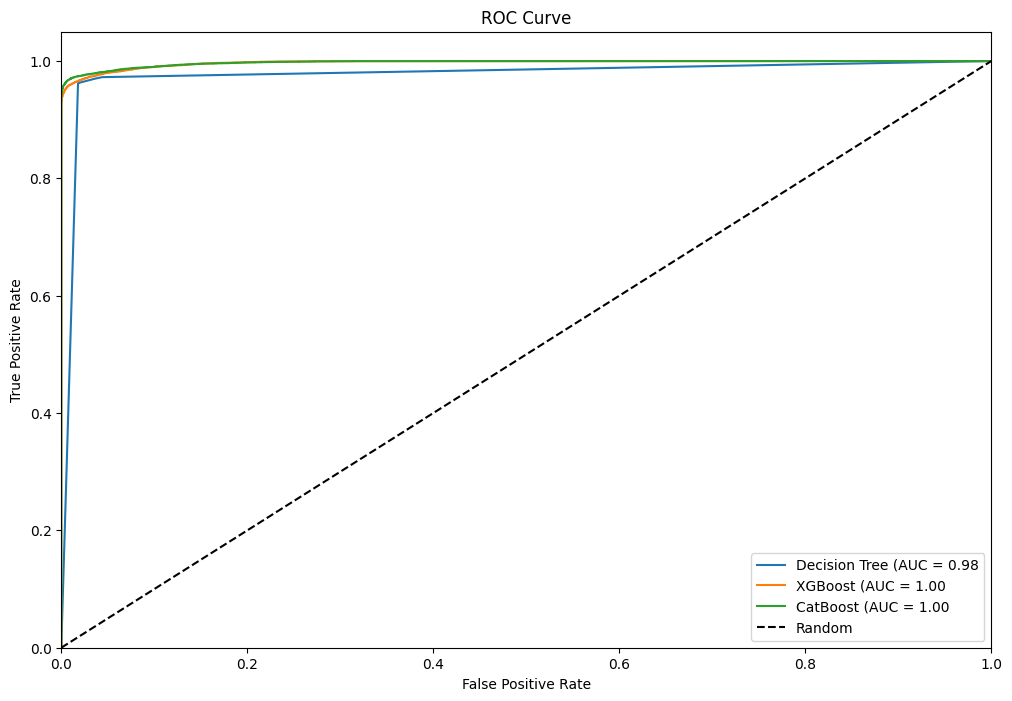

In [28]:
classifiers = [ dt_classifier,  xgb_classifier, catboost_classifier ]
classifier_names = ["Decision Tree", "XGBoost", "CatBoost", ]

# Create a function to plot ROC curve and calculate AUC
def plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test):
    plt.figure(figsize=(12, 8))
    for classifier, name in zip(classifiers, classifier_names):
        if hasattr(classifier, 'predict_proba'):  # Check if the classifier has predict_proba method
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        else:
            try:
                y_pred_prob = classifier.decision_function(X_test)
            except AttributeError:
                raise AttributeError(f"{name} does not have predict_proba or decision_function method.")

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f}")

    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves and calculate AUC for classifiers excluding Linear Regression
plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test)

## The Catboost is the best model to make predictions on it

## prediction on random data 

In [33]:
random_sample = df_encoded.sample(n=10, random_state=42)

# Separate features (X) and target variable (y)
X_sample = random_sample.drop("diabetes", axis=1)
y_sample = random_sample["diabetes"]

# Load the best CatBoost model with the identified parameters
best_catboost_model = CatBoostClassifier(random_seed=42, logging_level='Silent', learning_rate=0.1, depth=10, subsample=0.8)

# Fit the model to the entire training data using the best parameters
best_catboost_model.fit(X_train_clean, y_train_clean)

# Predict on the random sample
y_pred_sample = best_catboost_model.predict(X_sample)

# Display the predictions
predictions_df = pd.DataFrame({"Actual": y_sample, "Predicted": y_pred_sample})
print(predictions_df)

       Actual  Predicted
2547        0          0
34774       0          0
71084       1          1
50584       0          0
80788       0          0
46976       0          0
69385       0          0
57772       0          0
87690       0          0
35032       0          0
